# 1. Perkenalan

Nama : Fredyco Rizky

Batch : FTDS-018-RMT

Dataset : [Loan Prediction](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

Objective : Objective dari project kali ini adalah mencari model yang paling tepat untuk digunakan pada data [Loan Prediction](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset), dengan tujuan model untuk mempelajari pola dalam memprediksi apakah pengajuan pinjaman akan di approve atau tidak. Yang akan digunakan untuk memprediksi apakah pengajuan pinjaman akan di approve atau tidak dari data baru.

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#evaluasi Logistics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

#save model
import pickle
import json


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # Atur agar semua kolom ter load

# 3. Data Loading

Data yang digunakan berasal dari [kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

In [2]:
df = pd.read_csv("loan_predict.csv")

Cek 10 data pertama dan 10 data terakhir.

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Ubah isi data pada kolom Loan_Status dengan mengubah 'Y' menjadi True dan 'N' Menjadi False.

In [5]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y': True, 'N': False})

Cek apakah ada data yang null

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 58.3+ KB


In [7]:
df.shape

(614, 13)

Karena data yang nilainya null, banyak yang termasuk kedalam data categorical. Maka data yang bernilai null di drop. Karena jika data yang null dilakukan imputasi menggunakan mean dan modus maka data akan menjadi bias.

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 49.2+ KB


In [10]:
df.shape

(480, 13)

Sebelum di trimmed, jumlah data ada 614. Setelah di drop row yang berisi null data. Didapatkan hanya tersisa 480 data atau 78% dari keseluruhan data. Jumlah data memang menurun akan tetapi kualitas data masih baik, karena data tidak menjadi bias.

Cek apakah ada data yang terduplicate

In [11]:
df.duplicated().sum()

0

# 4. EDA

Kita buat plot untuk melihatah korelasi antar kolom independennya.

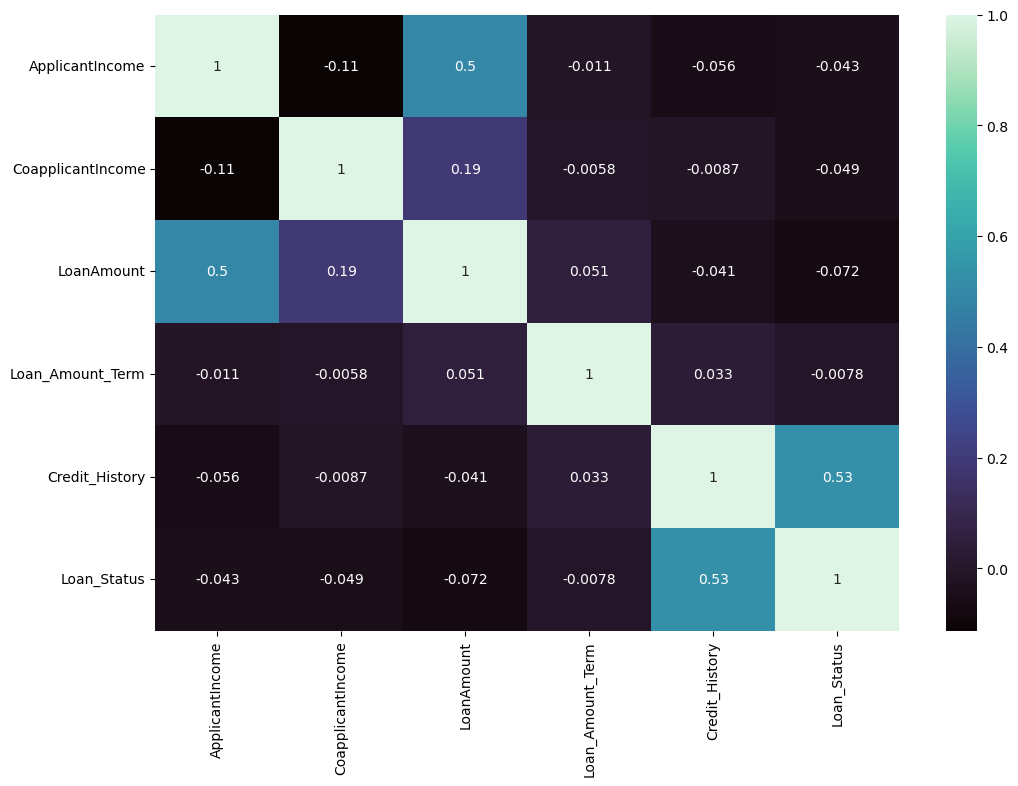

In [12]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="mako")
plt.show()

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,True
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,True
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,True
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,True
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,True


## Target

Kita lakukan eksplorasi data pada kolom target atau kolom dependen

In [14]:
target = df["Loan_Status"].value_counts().reset_index()
persen = df["Loan_Status"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["Loan_Status"]
target

,index,Loan_Status,percentage
0,True,332,0.691667
1,False,148,0.308333


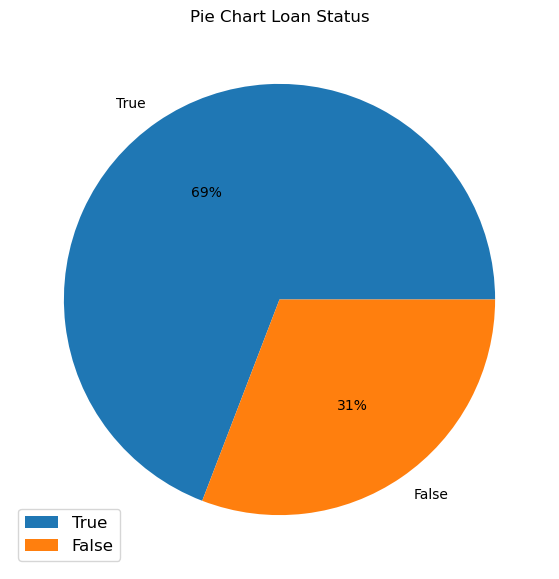

In [15]:
plt.figure(figsize=(12,7))


#sns.barplot(target["index"], target["percentage"])
plt.pie(target["percentage"], labels = target["index"], autopct='%.0f%%')
plt.title("Pie Chart Loan Status")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


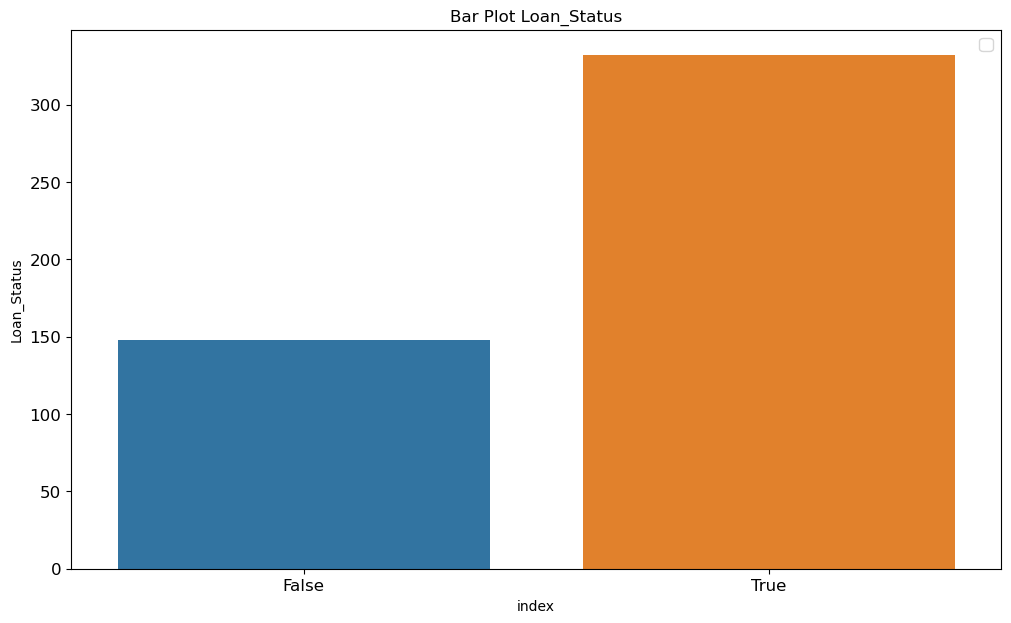

In [16]:
plt.figure(figsize=(12,7))


#sns.barplot(target["index"], target["percentage"])
sns.barplot(target["index"], target["Loan_Status"])
plt.title("Bar Plot Loan_Status")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

Dari tabel dan plot diatas didapatkan bahwa data dependen atau kolom target imbalanced, dimana pengajuan yang diapprove sebanyak 69% dan pengajuan yang tidak di approve sebanyak 31%.

## Eksplorasi data numeric

### `ApplicantIncome`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


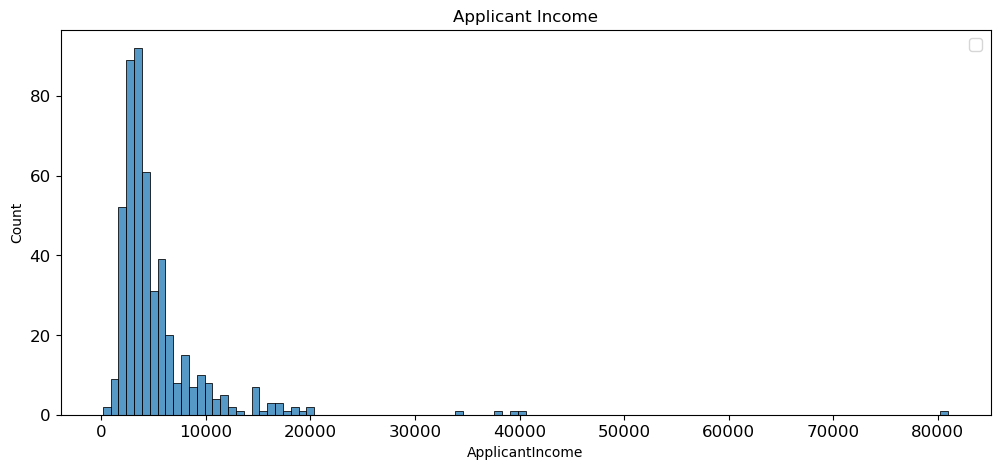

In [17]:
plt.figure(figsize=(12,5))


sns.histplot(df["ApplicantIncome"])
plt.title("Applicant Income")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [18]:
print("Nilai maksimum dari ApplicantIncome adalah : ",df["ApplicantIncome"].max())
print("Nilai minimum dari ApplicantIncome adalah : ",df["ApplicantIncome"].min())
print("Nilai rata-rata dari ApplicantIncome adalah : ",df["ApplicantIncome"].mean())

Nilai maksimum dari ApplicantIncome adalah :  81000
Nilai minimum dari ApplicantIncome adalah :  150
Nilai rata-rata dari ApplicantIncome adalah :  5364.23125


Text(0.5, 1.0, 'Applicant Income pinjaman yang tidak di approve')

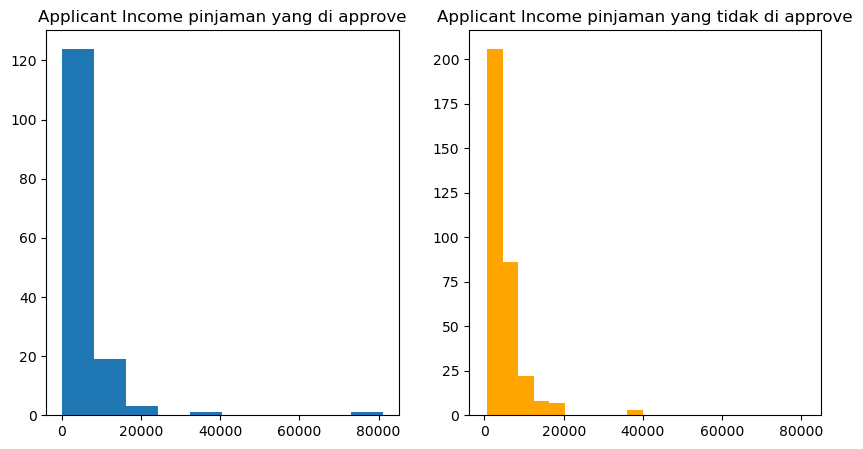

In [19]:
no_bayar = df[df["Loan_Status"] == False]["ApplicantIncome"].reset_index()
bayar = df[df["Loan_Status"] == True]["ApplicantIncome"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(no_bayar["ApplicantIncome"])
axes[0].set_title("Applicant Income pinjaman yang di approve")
axes[1].hist(bayar["ApplicantIncome"], color='orange')
axes[1].set_title("Applicant Income pinjaman yang tidak di approve")

In [20]:
print("Nilai maksimum dari Applicant Income orang yang tidak di approve adalah : ",no_bayar["ApplicantIncome"].max())
print("Nilai minimum dari Applicant Income orang yang tidak di approve adalah : ",no_bayar["ApplicantIncome"].min())
print("Nilai rata-rata dari Applicant Income orang yang tidak di approve adalah : ",no_bayar["ApplicantIncome"].mean())
print("")
print("Nilai maksimum dari Applicant Income orang yang di approve adalah : ",bayar["ApplicantIncome"].max())
print("Nilai minimum dari Applicant Income orang yang di approve adalah : ",bayar["ApplicantIncome"].min())
print("Nilai rata-rata dari Applicant Income orang yang di approve adalah : ",bayar["ApplicantIncome"].mean())

Nilai maksimum dari Applicant Income orang yang tidak di approve adalah :  81000
Nilai minimum dari Applicant Income orang yang tidak di approve adalah :  150
Nilai rata-rata dari Applicant Income orang yang tidak di approve adalah :  5730.189189189189

Nilai maksimum dari Applicant Income orang yang di approve adalah :  39999
Nilai minimum dari Applicant Income orang yang di approve adalah :  645
Nilai rata-rata dari Applicant Income orang yang di approve adalah :  5201.093373493976


Dari tabel dan plot diatas ditemukan bahwa rata-rata applicant income tidak terlalu berbeda antara pinjaman yang di approve dan tidak. Akan tetapi nilai minimal Applicant income untuk pengajuan pinjaman adalah 645.

### `CoapplicantIncome`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


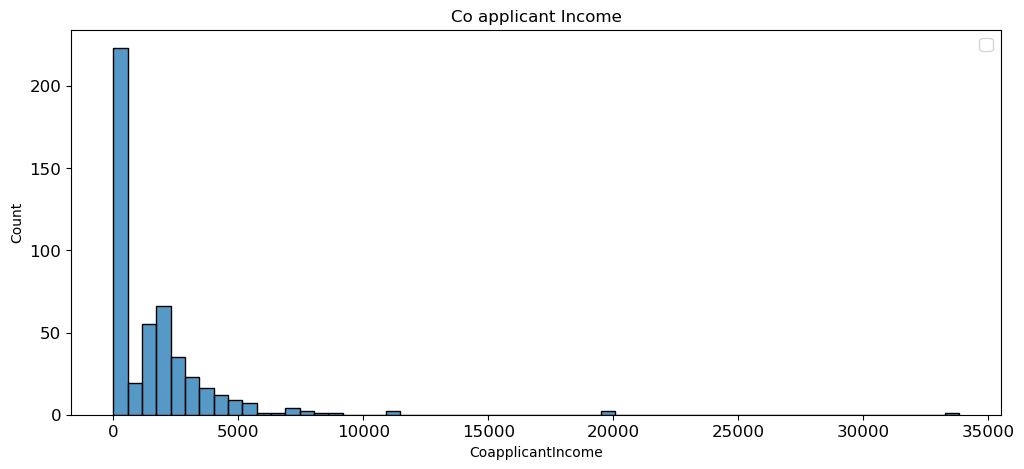

In [21]:
plt.figure(figsize=(12,5))


sns.histplot(df["CoapplicantIncome"])
plt.title("Co applicant Income")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [22]:
print("Nilai maksimum dari Co applicant Income adalah : ",df["CoapplicantIncome"].max())
print("Nilai minimum dari Co applicant Income adalah : ",df["CoapplicantIncome"].min())
print("Nilai rata-rata dari Co applicant Income adalah : ",df["CoapplicantIncome"].mean())

Nilai maksimum dari Co applicant Income adalah :  33837.0
Nilai minimum dari Co applicant Income adalah :  0.0
Nilai rata-rata dari Co applicant Income adalah :  1581.0935833096667


Text(0.5, 1.0, 'Co applicant Income pinjaman yang tidak di approve')

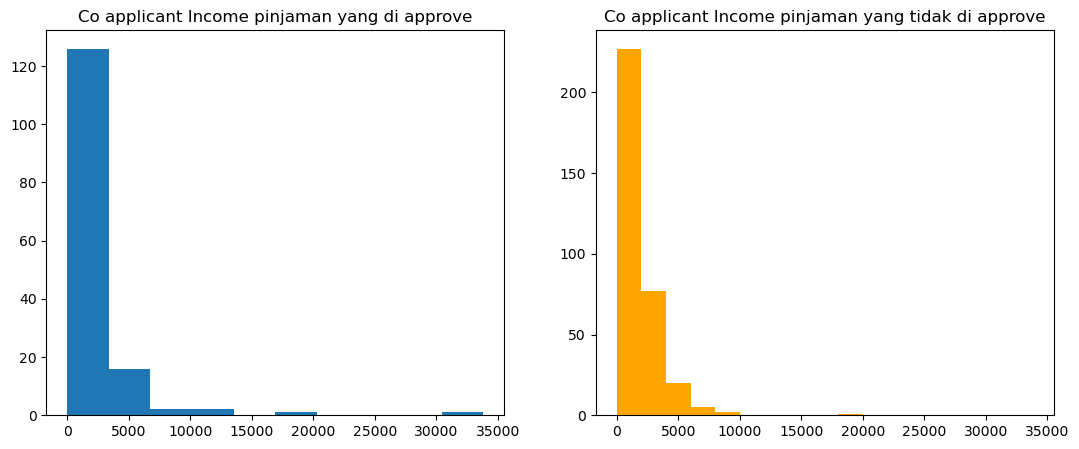

In [23]:
no_bayar = df[df["Loan_Status"] == False]["CoapplicantIncome"].reset_index()
bayar = df[df["Loan_Status"] == True]["CoapplicantIncome"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
axes[0].hist(no_bayar["CoapplicantIncome"])
axes[0].set_title("Co applicant Income pinjaman yang di approve")
axes[1].hist(bayar["CoapplicantIncome"], color='orange')
axes[1].set_title("Co applicant Income pinjaman yang tidak di approve")

In [24]:
print("Nilai maksimum dari Co applicant Income orang yang tidak di approve adalah : ",no_bayar["CoapplicantIncome"].max())
print("Nilai minimum dari Co applicant Income orang yang tidak di approve adalah : ",no_bayar["CoapplicantIncome"].min())
print("Nilai rata-rata dari Co applicant Income orang yang tidak di approve adalah : ",no_bayar["CoapplicantIncome"].mean())
print("")
print("Nilai maksimum dari Co applicant Income orang yang di approve adalah : ",bayar["CoapplicantIncome"].max())
print("Nilai minimum dari Co applicant Income orang yang di approve adalah : ",bayar["CoapplicantIncome"].min())
print("Nilai rata-rata dari Co applicant Income orang yang di approve adalah : ",bayar["CoapplicantIncome"].mean())

Nilai maksimum dari Co applicant Income orang yang tidak di approve adalah :  33837.0
Nilai minimum dari Co applicant Income orang yang tidak di approve adalah :  0.0
Nilai rata-rata dari Co applicant Income orang yang tidak di approve adalah :  1773.081081081081

Nilai maksimum dari Co applicant Income orang yang di approve adalah :  20000.0
Nilai minimum dari Co applicant Income orang yang di approve adalah :  0.0
Nilai rata-rata dari Co applicant Income orang yang di approve adalah :  1495.508795146506


ari tabel dan plot diatas ditemukan bahwa rata-rata Co applicant income tidak terlalu berbeda antara pinjaman yang di approve dan tidak. Bahkan rata-rata nilai Co Applicant Income dari pinjaman yang di approve itu lebih kecil dibanding rata-rata Co Applicant Income pinjaman yang tidak di approve.

### `LoanAmount`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


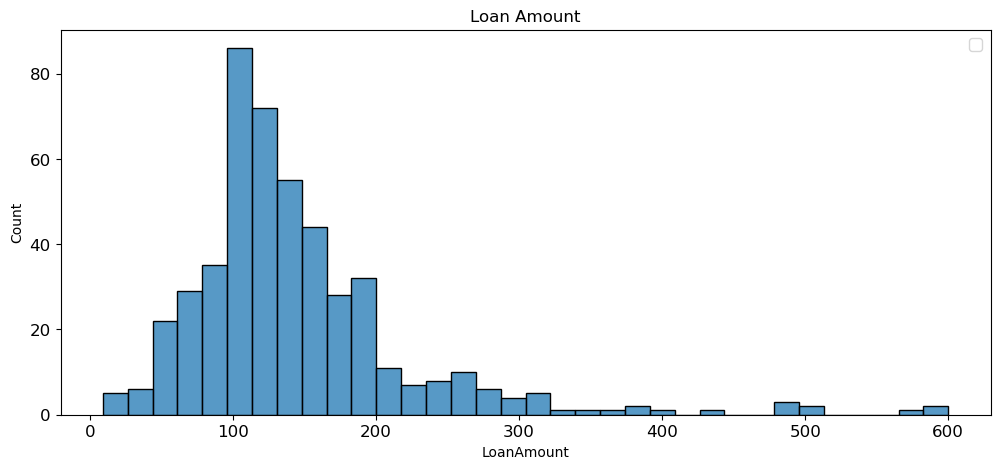

In [25]:
plt.figure(figsize=(12,5))


sns.histplot(df["LoanAmount"])
plt.title("Loan Amount")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [26]:
print("Nilai maksimum dari Loan Amount adalah : ",df["LoanAmount"].max())
print("Nilai minimum dari Loan Amount adalah : ",df["LoanAmount"].min())
print("Nilai rata-rata dari Loan Amount adalah : ",df["LoanAmount"].mean())

Nilai maksimum dari Loan Amount adalah :  600.0
Nilai minimum dari Loan Amount adalah :  9.0
Nilai rata-rata dari Loan Amount adalah :  144.73541666666668


Text(0.5, 1.0, 'Loan Amount pinjaman yang tidak di approve')

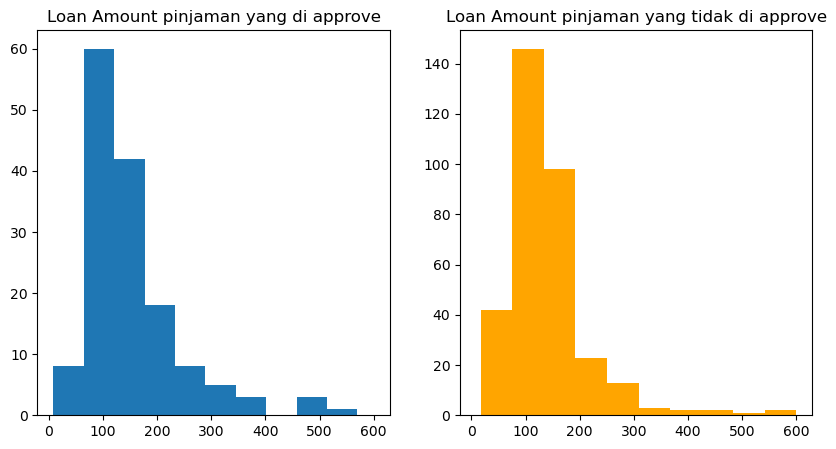

In [27]:
no_bayar = df[df["Loan_Status"] == False]["LoanAmount"].reset_index()
bayar = df[df["Loan_Status"] == True]["LoanAmount"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(no_bayar["LoanAmount"])
axes[0].set_title("Loan Amount pinjaman yang di approve")
axes[1].hist(bayar["LoanAmount"], color='orange')
axes[1].set_title("Loan Amount pinjaman yang tidak di approve")

In [28]:
print("Nilai maksimum dari Loan Amount orang yang tidak di approve adalah : ",no_bayar["LoanAmount"].max())
print("Nilai minimum dari Loan Amount orang yang tidak di approve adalah : ",no_bayar["LoanAmount"].min())
print("Nilai rata-rata dari Loan Amount orang yang tidak di approve adalah : ",no_bayar["LoanAmount"].mean())
print("")
print("Nilai maksimum dari Loan Amount orang yang di approve adalah : ",bayar["LoanAmount"].max())
print("Nilai minimum dari Loan Amount orang yang di approve adalah : ",bayar["LoanAmount"].min())
print("Nilai rata-rata dari Loan Amount orang yang di approve adalah : ",bayar["LoanAmount"].mean())

Nilai maksimum dari Loan Amount orang yang tidak di approve adalah :  570.0
Nilai minimum dari Loan Amount orang yang tidak di approve adalah :  9.0
Nilai rata-rata dari Loan Amount orang yang tidak di approve adalah :  153.3783783783784

Nilai maksimum dari Loan Amount orang yang di approve adalah :  600.0
Nilai minimum dari Loan Amount orang yang di approve adalah :  17.0
Nilai rata-rata dari Loan Amount orang yang di approve adalah :  140.88253012048193


Dari tabel dan plot diatas didapatkan bahwa tidak ada perbedaan yang sangat signifikan terhadap loan amount dari pinjaman yang di approve dan yang tidak. Akan tetapi rata-rata pinjaman yang approve itu sedikit lebih rendah dari rata-rata pinjaman yang tidak di approve.

## Eksplorasi data categorical

#### `Gender`

In [29]:
sex_total = df["Gender"].value_counts().reset_index()
persen_sex = df["Gender"].value_counts(normalize=True).reset_index()
sex_total["percentage"] = persen_sex["Gender"]
sex_total

,index,Gender,percentage
0,Male,394,0.820833
1,Female,86,0.179167


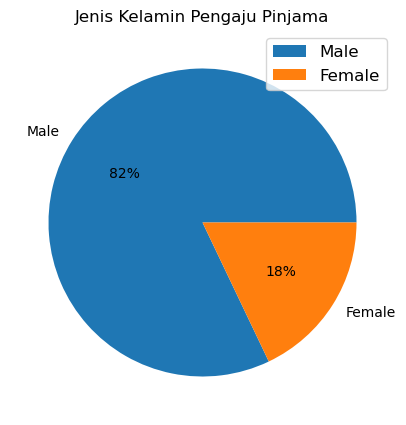

In [30]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(sex_total["percentage"], labels = ["Male", "Female"], autopct='%.0f%%')
plt.title("Jenis Kelamin Pengaju Pinjama")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [31]:
sex = df.groupby(["Gender"], as_index=False)["Loan_Status"].value_counts()
percentage_acc_sex = df.groupby(["Gender"], as_index=False)["Loan_Status"].value_counts(normalize=True)
sex["percentage"] = percentage_acc_sex["proportion"]
sex

,Gender,Loan_Status,count,percentage
0,Female,True,54,0.627907
1,Female,False,32,0.372093
2,Male,True,278,0.705584
3,Male,False,116,0.294416


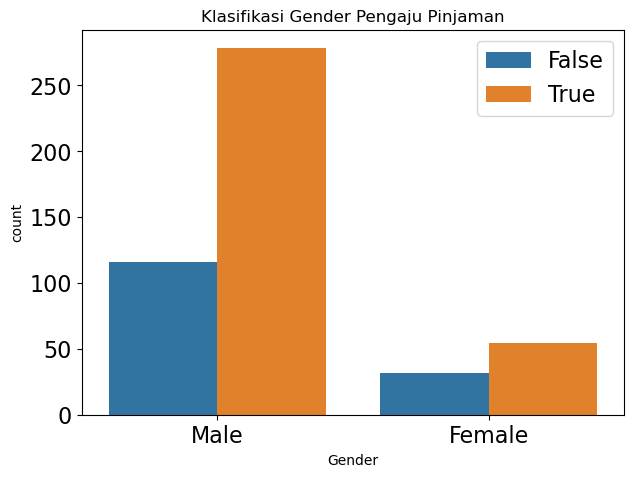

In [32]:
plt.figure(figsize=(7,5))

sns.countplot(df["Gender"], hue = df["Loan_Status"])
plt.title("Klasifikasi Gender Pengaju Pinjaman")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.legend(fontsize=16)

Dari tabel dan plot diatas didapatkan bahwa mayoritas pengaju pinjaman adalah laki-laki, Selain itu didapatkan juga bahwa pengaju pinjaman berjenis kelamin pria memiliki peluang lebih besar untuk di approve pinjamannya jika dibandingkan dengan perempuan.

#### `Property_Area`

In [33]:
property_total = df["Property_Area"].value_counts().reset_index()
persen_property = df["Property_Area"].value_counts(normalize=True).reset_index()
property_total["percentage"] = persen_property["Property_Area"]
property_total

,index,Property_Area,percentage
0,Semiurban,191,0.397917
1,Urban,150,0.312500
2,Rural,139,0.289583


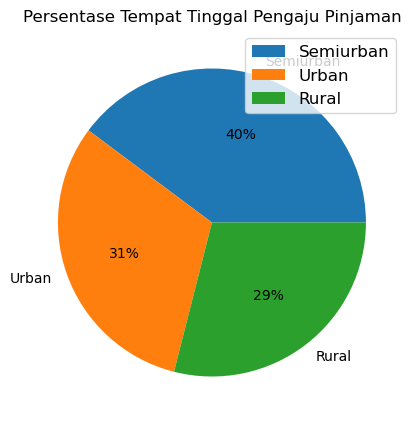

In [34]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(property_total["percentage"], labels = property_total['index'], autopct='%.0f%%')
plt.title("Persentase Tempat Tinggal Pengaju Pinjaman")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [35]:
Property_Area = df.groupby(["Property_Area"], as_index=False)["Loan_Status"].value_counts()
percentage_acc_Property_Area = df.groupby(["Property_Area"], as_index=False)["Loan_Status"].value_counts(normalize=True)
Property_Area["percentage"] = percentage_acc_Property_Area["proportion"]
Property_Area

,Property_Area,Loan_Status,count,percentage
0,Rural,True,85,0.611511
1,Rural,False,54,0.388489
2,Semiurban,True,149,0.780105
3,Semiurban,False,42,0.219895
4,Urban,True,98,0.653333
5,Urban,False,52,0.346667


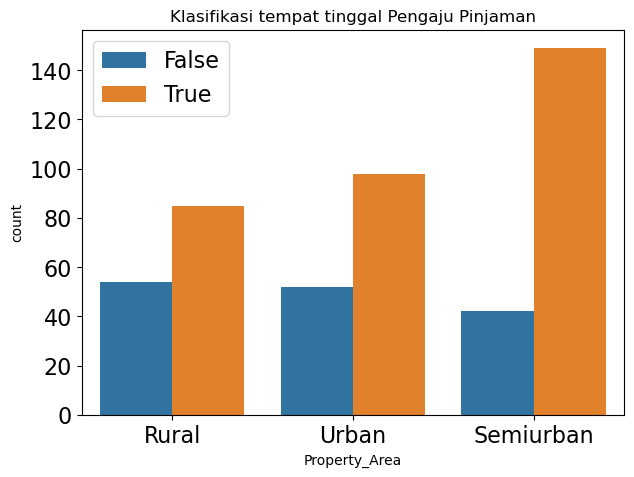

In [36]:
plt.figure(figsize=(7,5))

sns.countplot(df["Property_Area"], hue = df["Loan_Status"])
plt.title("Klasifikasi tempat tinggal Pengaju Pinjaman")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.legend(fontsize=16)

Dari tabel dan plot diatas didapatkan bahwa tempat tinggal pengaju pinjaman mempengaruhi apakah pinjaman di approve atau tidak, hal ini dapat dibuktikan dari pengaju pinjaman yang tinggal di ara Semiurban memiliki kemungkinan pinjaman di approve lebih besar dari orang yang tinggal di Rural dan Urban.

#### `Education`

In [37]:
Education_total = df["Education"].value_counts().reset_index()
persen_Education = df["Education"].value_counts(normalize=True).reset_index()
Education_total["percentage"] = persen_Education["Education"]
Education_total

,index,Education,percentage
0,Graduate,383,0.797917
1,Not Graduate,97,0.202083


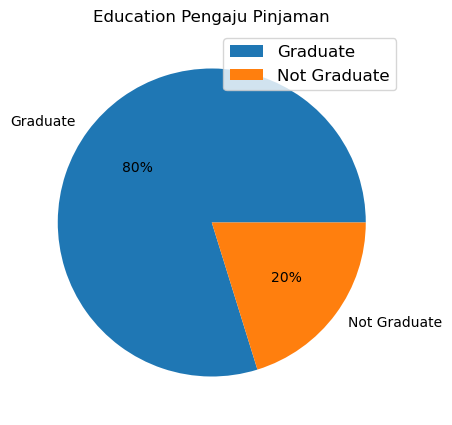

In [38]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(Education_total["percentage"], labels = Education_total['index'], autopct='%.0f%%')
plt.title("Education Pengaju Pinjaman")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [39]:
Education = df.groupby(["Education"], as_index=False)["Loan_Status"].value_counts()
percentage_acc_Education = df.groupby(["Education"], as_index=False)["Loan_Status"].value_counts(normalize=True)
Education["percentage"] = percentage_acc_Education["proportion"]
Education

,Education,Loan_Status,count,percentage
0,Graduate,True,271,0.707572
1,Graduate,False,112,0.292428
2,Not Graduate,True,61,0.628866
3,Not Graduate,False,36,0.371134


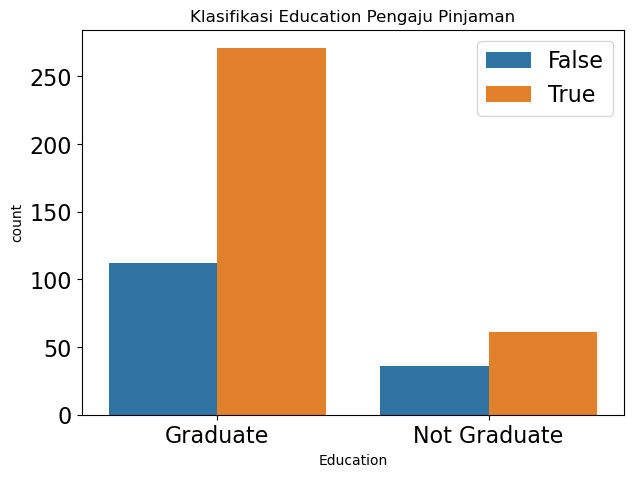

In [40]:
plt.figure(figsize=(7,5))

sns.countplot(df["Education"], hue = df["Loan_Status"])
plt.title("Klasifikasi Education Pengaju Pinjaman")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.legend(fontsize=16)

Dari tabel dan plot diatas didapatkan bahwa mayoritas edukasi pengaju pinjaman itu adalah Graduate, Selain itu didapatkan bahwa orang yang memiliki tingkat pendidikan Graduate itu memiliki peluang lebih besar untuk di approve pinjamannya dibanding orang yang tidak graduate.

# 5. Feature Engineering

## Columns Selection

Pembagian kolom Numerical dan Categorical

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,True
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,True


Berdasarkan hasil dari Analisis yang dilakukan, kolom yang akan digunakan untuk membuat model, yaitu:

- Data Target : `Loan_Status`
- Data Numeric : `'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'`
- Data Categorical Nominal : `'Gender','Married','Dependents','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'`
- Data Categorical Ordinal : `'Education'`

In [42]:
target = ['Loan_Status'] # target
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] # Numeric
catn_cols = ['Gender','Married','Dependents','Self_Employed', 'Credit_History', 'Property_Area','Education'] # Nominal

Membuat dataframe yang hanya berisi kolom yang ingin digunakan

In [43]:
df2 = df[catn_cols + num_cols + target]
df2 # Datframe yang hanya berisi kolom yang akan digunakan

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,Male,Yes,1,No,1.0,Rural,Graduate,4583,1508.0,128.0,360.0,False
2,Male,Yes,0,Yes,1.0,Urban,Graduate,3000,0.0,66.0,360.0,True
3,Male,Yes,0,No,1.0,Urban,Not Graduate,2583,2358.0,120.0,360.0,True
4,Male,No,0,No,1.0,Urban,Graduate,6000,0.0,141.0,360.0,True
5,Male,Yes,2,Yes,1.0,Urban,Graduate,5417,4196.0,267.0,360.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,No,1.0,Rural,Graduate,2900,0.0,71.0,360.0,True
610,Male,Yes,3+,No,1.0,Rural,Graduate,4106,0.0,40.0,180.0,True
611,Male,Yes,1,No,1.0,Urban,Graduate,8072,240.0,253.0,360.0,True
612,Male,Yes,2,No,1.0,Urban,Graduate,7583,0.0,187.0,360.0,True


Kolom yang tidak digunakan hanyalah kolom `Loan_ID`

Perbandingan Dataframe yang belum dipilih kolomnya dan Dataframe yang sudah dipilih kolomnya

In [44]:
print("Shape sebelum Columns Selection : ", df.shape)
print("Shape setelah Columns Selection : ", df2.shape)

Shape sebelum Columns Selection :  (480, 13)
Shape setelah Columns Selection :  (480, 12)


## Split Between Features and Target

Split Features dengan target denga variabel X sebagai features dan variabel y sebagai Target

In [45]:
# Splitting between X dan y
X = df2.drop(["Loan_Status"],axis=1) # Features
y = df2["Loan_Status"] # Target

print("Features size : ", X.shape)
print("Target size : ", y.shape)

Features size :  (480, 11)
Target size :  (480,)


## Split Between Train-Set and Test-Set

Split Data X,y menjadi 2, yaitu:

- X_train, y_train
- X_test, y_test

untuk melatih dan mengecek model ML

In [46]:
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.2, random_state=24)) # Dengan persentase 80% | 20% untuk Train | Test

print("Features train size : ", X_train.shape)
print("target train size : ", y_train.shape)
print("")
print("Features test size : ", X_test.shape)
print("target test size : ", y_test.shape)

Features train size :  (384, 11)
target train size :  (384,)

Features test size :  (96, 11)
target test size :  (96,)


Pisah data train dan test dengan perbandingan 80/20.

## Handling Outlier

In [47]:
normal = []
skew = []

def cari_outlier(df, arg1):
    a = df[arg1].skew()
    if a > 0.5 or a < -0.5:
        IQR = df[arg1].quantile(0.75) - df[arg1].quantile(0.25)
        skew.append((arg1, a))
        print("---------------------------------------------------------------------------")
        print(f"DATA {arg1} SKEW : {a}")
        print("")
        print(f"Maximum {arg1} : ",df[arg1].max())
        print(f"Upper Boundary {arg1} : ", df[arg1].quantile(0.75) + (IQR * 3))
        print("")
        print(f"Minimum {arg1} : ",df[arg1].min())
        print(f"Lower Boundary {arg1} : ", df[arg1].quantile(0.75) - (IQR * 3))
        print("")
        print(f"Average {arg1} : ",df[arg1].max())
        print("---------------------------------------------------------------------------")
        print("")
    else:
        normal.append((arg1, a))
        print("---------------------------------------------------------------------------")
        print(f"DATA {arg1} NORMAL : {a}")
        print("")
        print(f"Maximum {arg1} : ",df[arg1].max())
        print(f"Upper Boundary {arg1} : ", df[arg1].mean() + 3 * df[arg1].std())
        print("")
        print(f"Minimum {arg1} : ",df[arg1].min())
        print(f"Lower Boundary {arg1} : ", df[arg1].mean() - 3 * df[arg1].std())
        print("")
        print(f"Average {arg1} : ",df[arg1].max())
        print("---------------------------------------------------------------------------")
        print("")

for x in X_train[num_cols]:
    cari_outlier(X_train,x)

---------------------------------------------------------------------------
DATA ApplicantIncome SKEW : 7.309000048124248

Maximum ApplicantIncome :  81000
Upper Boundary ApplicantIncome :  14527.0

Minimum ApplicantIncome :  150
Lower Boundary ApplicantIncome :  -2888.0

Average ApplicantIncome :  81000
---------------------------------------------------------------------------

---------------------------------------------------------------------------
DATA CoapplicantIncome SKEW : 5.95928268556187

Maximum CoapplicantIncome :  33837.0
Upper Boundary CoapplicantIncome :  8919.0

Minimum CoapplicantIncome :  0.0
Lower Boundary CoapplicantIncome :  -4459.5

Average CoapplicantIncome :  33837.0
---------------------------------------------------------------------------

---------------------------------------------------------------------------
DATA LoanAmount SKEW : 2.4933914474522316

Maximum LoanAmount :  600.0
Upper Boundary LoanAmount :  372.75

Minimum LoanAmount :  9.0
Lower Boun

Dari hasil yang didapatkan saat handling outlier dan EDA, Didapatkan bahwa kolom yang terdeteksi sebagai outlier pada saat handling outlier merupakan natural outlier. Oleh karena itu data yang terdeteksi sebagai outlier di data tidak di trimmed.

## Check Cardinality

In [48]:
for x in catn_cols:
    print(f"Jumlah variable dalam kolom {x} :", len(X_train[x].unique()))

Jumlah variable dalam kolom Gender : 2
Jumlah variable dalam kolom Married : 2
Jumlah variable dalam kolom Dependents : 4
Jumlah variable dalam kolom Self_Employed : 2
Jumlah variable dalam kolom Credit_History : 2
Jumlah variable dalam kolom Property_Area : 3
Jumlah variable dalam kolom Education : 2


Setelah di cek didapatkan bahwa jumlah variable dalam suatu kolom masih kecil.

## Handling Missing Values

Cek apakah ada missing value pada dataframe yang akan digunakan, yaitu dataframe X_train, X_test, y_train, y_test.

In [49]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Self_Employed        0
Credit_History       0
Property_Area        0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [50]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Self_Employed        0
Credit_History       0
Property_Area        0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [51]:
y_train.isnull().sum()

0

In [52]:
y_test.isnull().sum()

0

Dari informasi yang didapatkan diatas disimpulkan bahwa tidak ada missing value pada variabel X_train, X_test, y_train dan y_test

## Split Between Numerical and Categorical Values

Memisahkan data numerical dan categorical untuk scaling dan encoding

In [53]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' ] # Numeric
catn_cols = ['Gender','Married','Dependents','Self_Employed',  'Credit_History', 'Property_Area','Education'] # Nominal

Pecah dataframe X_train dan X_test menjadi 3 jenis yaitu `Numerical data, Categorical Nominal Data dan Categorical Ordinal Data`

In [54]:
X_train_num = X_train[num_cols] # X_train Numerical Data
X_test_num = X_test[num_cols] # X_test Numerical Data

X_train_catn = X_train[catn_cols] # X_train Categorical Nominal Data
X_test_catn = X_test[catn_cols] # X_test Categorical Nominal Data

Dari hasil yang didapatkan saat handling outlier dan EDA, Didapatkan bahwa kolom yang terdeteksi sebagai outlier pada saat handling outlier merupakan natural outlier. Oleh karena itu data yang terdeteksi sebagai outlier di data tidak di trimmed.

## Feature Scaling

Scaling data yang ada pada kolom numeric agar model tidak bias pada kolom yang memiliki jumlah data yang besar

cek kolom apa saja yang termasuk kolom numerik

In [55]:
X_train_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
208,2479,0.0,59.0,360.0
96,2484,2302.0,137.0,360.0
386,2346,1600.0,132.0,360.0
74,5266,1774.0,187.0,360.0
71,1875,1875.0,97.0,360.0
...,...,...,...,...
514,5815,3666.0,311.0,360.0
439,7142,0.0,138.0,360.0
247,6608,0.0,137.0,180.0
496,2600,1700.0,107.0,360.0


dari kolom tersebut cek distribusi datanya apakah skew atau normal

In [56]:
normal = []
skew = []

def skewi(df, arg1):
    a = df[arg1].skew()
    if a > 0.5 or a < -0.5:
        skew.append((arg1, a))
    else:
        normal.append((arg1, a))

for x in num_cols:
    skewi(X_train_num,x)

print(normal)
print(skew)

[]
[('ApplicantIncome', 7.309000048124248), ('CoapplicantIncome', 5.95928268556187), ('LoanAmount', 2.4933914474522316), ('Loan_Amount_Term', -2.126016891282486)]


Dari hasil perhitungan skew didapatkan bahwa semua kolom termasuk kolom yang skew, oleh karena itu digunakan MinMaxScaler, karena MinMaxScaler itu lebih baik digunakan pada data yang skew.

In [57]:
scaler = MinMaxScaler()
scaler.fit(X_train_num) # Harus pake train karena kalau pake test itu nyontek

X_train_num_scaled = scaler.transform(X_train_num) # Scalling train
X_test_num_scaled = scaler.transform(X_test_num) # Scalling test


## Feature Encoding

### Categorical Nominal Encoding

Cek ada kolom apa saja yang berjenis Nominal data

In [58]:
X_train_catn

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area,Education
208,Male,No,0,No,1.0,Urban,Graduate
96,Female,Yes,0,No,1.0,Semiurban,Graduate
386,Male,No,0,No,1.0,Semiurban,Not Graduate
74,Male,Yes,3+,Yes,1.0,Semiurban,Graduate
71,Male,Yes,2,Yes,1.0,Semiurban,Not Graduate
...,...,...,...,...,...,...,...
514,Male,No,0,No,1.0,Rural,Graduate
439,Female,Yes,0,Yes,1.0,Rural,Not Graduate
247,Male,Yes,1,No,1.0,Urban,Not Graduate
496,Male,Yes,0,No,1.0,Rural,Not Graduate


Karena data nominal pada dataframe sudah dikelompokkan maka datanya bisa langsung di encoding menggunakan OneHotEncoder

In [59]:
encodern = OneHotEncoder()

encodern.fit(X_train_catn)

X_train_catn_encoded = encodern.transform(X_train_catn).toarray() # Encoding Nominal Train
X_test_catn_encoded = encodern.transform(X_test_catn).toarray() # Encoding Nominal Test

## Concate between Numerical and Categorical Columns

In [60]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_catn_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_catn_encoded], axis=1)

# 6. Model Definition

Gunakan model dengan parameter default untuk mencari model terbaik yang akan di tuning hyper parameternya.

## Logistic Regression

In [61]:
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer_1, catn_cols)
])

# Define the pipeline with preprocessing and classification steps
pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

## SVM

In [62]:
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat1', categorical_transformer_1, catn_cols)
    ])

# Define the pipeline with preprocessing and classification steps
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

## KNN

In [63]:
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat1', categorical_transformer_1, catn_cols)
    ])

# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

## Decision Tree

In [64]:
numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat1', categorical_transformer_1, catn_cols)
    ])

# Define the pipeline with preprocessing and classification steps
pipeline_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=24))
])

# 7. Model Training

Training model yang sudah di definisikan pada bagian Model Definition

## Logistic Regression

In [65]:
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                       

## SVM

In [66]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

## KNN

In [67]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

## Decision Tree

In [68]:
pipeline_dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

# 8. Model Evaluation

Evaluasi model yang sudah di train menggunakan f1-score, accuracy score, precision score, classification report dan confusion matrix. Dengan tujuan utamanya mencari model yang memiliki hasil precision terbaik , Karena tujuan dari model ini adalah untuk mencari model yang memiliki `True Positive Rate` yang paling tinggi. Karena menurut personal judgement yang saya miliki, hasil `false postif rate` yang tinggi akan mengakibatkan kesalahan prediksi pendapatan yang cukup fatal. Contoh jika orang yang mengajukan pinjaman ini termasuk kedalam jenis orang yang seharusnya tidak diberikan karena orang ini termasuk kepada ciri-ciri orang yang tidak akan membayar pinjaman, akan tetapi hasil prediksi yang kita dapatkan mengatakan bahwa orang ini adalah ciri-ciri orang yang aman untuk di approve pinjamannya. Maka hasil prediksi yang kita dapatkan dapat membuat perusahaan rugi karena memberikan pinjaman kepada orang yang salah.

## Logistic Regression

In [69]:
y_pred_train = pipeline_log.predict(X_train)
y_pred_test = pipeline_log.predict(X_test)

In [70]:
print("Accuracy Score")
train_accuracy_log = accuracy_score(y_train, y_pred_train)
test_accuracy_log = accuracy_score(y_test,y_pred_test)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_log, test_accuracy_log))
print("")
print("Precision Score")
train_precision_log = precision_score(y_train, y_pred_train)
test_precision_log = precision_score(y_test,y_pred_test)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_log, test_precision_log))
print("")
print("Recall Score")
train_recall_log = recall_score(y_train, y_pred_train)
test_recall_log = recall_score(y_test,y_pred_test)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_log, test_recall_log))
print("")
print("F1 Score")
train_f1_log = f1_score(y_train, y_pred_train)
test_f1_log = f1_score(y_test,y_pred_test)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_log, test_f1_log))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test))

Accuracy Score
Train Score: 0.8098958333333334
Test Score: 0.8020833333333334

Precision Score
Train Precision: 0.7938461538461539
Test Precision: 0.788235294117647

Recall Score
Train Recall: 0.9772727272727273
Test Recall: 0.9852941176470589

F1 Score
Train F1: 0.8760611205432937
Test F1: 0.8758169934640523

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.91      0.36      0.51        28
        True       0.79      0.99      0.88        68

    accuracy                           0.80        96
   macro avg       0.85      0.67      0.69        96
weighted avg       0.82      0.80      0.77        96



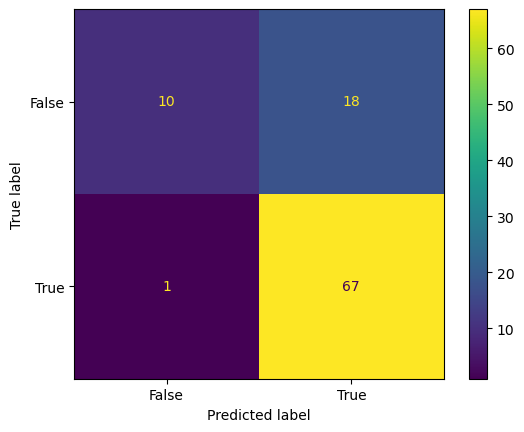

In [71]:
cm_log = confusion_matrix(y_test, y_pred_test, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

## SVC

In [72]:
y_pred_train_svc = pipeline_svc.predict(X_train)
y_pred_test_svc = pipeline_svc.predict(X_test)

In [73]:
print("Accuracy Score")
train_accuracy_svc = accuracy_score(y_train, y_pred_train_svc)
test_accuracy_svc = accuracy_score(y_test,y_pred_test_svc)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_svc, test_accuracy_svc))
print("")
print("Precision Score")
train_precision_svc = precision_score(y_train, y_pred_train_svc)
test_precision_svc = precision_score(y_test,y_pred_test_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_svc, test_precision_svc))
print("")
print("Recall Score")
train_recall_svc = recall_score(y_train, y_pred_train_svc)
test_recall_svc = recall_score(y_test,y_pred_test_svc)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_svc, test_recall_svc))
print("")
print("F1 Score")
train_f1_svc = f1_score(y_train, y_pred_train_svc)
test_f1_svc = f1_score(y_test,y_pred_test_svc)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_svc, test_f1_svc))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_svc))

Accuracy Score
Train Score: 0.8098958333333334
Test Score: 0.8020833333333334

Precision Score
Train Precision: 0.7938461538461539
Test Precision: 0.788235294117647

Recall Score
Train Recall: 0.9772727272727273
Test Recall: 0.9852941176470589

F1 Score
Train F1: 0.8760611205432937
Test F1: 0.8758169934640523

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.91      0.36      0.51        28
        True       0.79      0.99      0.88        68

    accuracy                           0.80        96
   macro avg       0.85      0.67      0.69        96
weighted avg       0.82      0.80      0.77        96



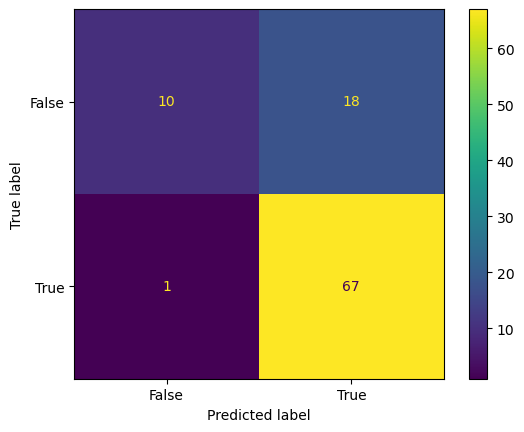

In [74]:
cm_svc = confusion_matrix(y_test, y_pred_test_svc, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

## KNN

In [75]:
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

In [76]:
print("Accuracy Score")
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test,y_pred_test_knn)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_knn, test_accuracy_knn))
print("")
print("Precision Score")
train_precision_knn = precision_score(y_train, y_pred_train_knn)
test_precision_knn = precision_score(y_test,y_pred_test_knn)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_knn, test_precision_knn))
print("")
print("Recall Score")
train_recall_knn = recall_score(y_train, y_pred_train_knn)
test_recall_knn = recall_score(y_test,y_pred_test_knn)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_knn, test_recall_knn))
print("")
print("F1 Score")
train_f1_knn = f1_score(y_train, y_pred_train_knn)
test_f1_knn = f1_score(y_test,y_pred_test_knn)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_knn, test_f1_knn))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_knn))

Accuracy Score
Train Score: 0.8151041666666666
Test Score: 0.7291666666666666

Precision Score
Train Precision: 0.8102893890675241
Test Precision: 0.75

Recall Score
Train Recall: 0.9545454545454546
Test Recall: 0.9264705882352942

F1 Score
Train F1: 0.8765217391304349
Test F1: 0.8289473684210525

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.58      0.25      0.35        28
        True       0.75      0.93      0.83        68

    accuracy                           0.73        96
   macro avg       0.67      0.59      0.59        96
weighted avg       0.70      0.73      0.69        96



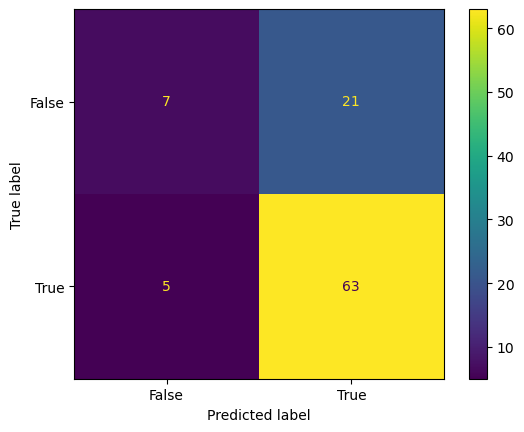

In [77]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

## Decision Tree

In [78]:
y_pred_train_dtr = pipeline_dtr.predict(X_train)
y_pred_test_dtr = pipeline_dtr.predict(X_test)

In [79]:
print("Accuracy Score")
train_accuracy_dtr = accuracy_score(y_train, y_pred_train_dtr)
test_accuracy_dtr = accuracy_score(y_test,y_pred_test_dtr)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_dtr, test_accuracy_dtr))
print("")
print("Precision Score")
train_precision_dtr = precision_score(y_train, y_pred_train_dtr)
test_precision_dtr = precision_score(y_test,y_pred_test_dtr)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_dtr, test_precision_dtr))
print("")
print("Recall Score")
train_recall_dtr = recall_score(y_train, y_pred_train_dtr)
test_recall_dtr = recall_score(y_test,y_pred_test_dtr)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_dtr, test_recall_dtr))
print("")
print("F1 Score")
train_f1_dtr = f1_score(y_train, y_pred_train_dtr)
test_f1_dtr = f1_score(y_test,y_pred_test_dtr)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_knn, test_f1_dtr))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_dtr))

Accuracy Score
Train Score: 1.0
Test Score: 0.65625

Precision Score
Train Precision: 1.0
Test Precision: 0.7692307692307693

Recall Score
Train Recall: 1.0
Test Recall: 0.7352941176470589

F1 Score
Train F1: 0.8765217391304349
Test F1: 0.7518796992481205

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.42      0.46      0.44        28
        True       0.77      0.74      0.75        68

    accuracy                           0.66        96
   macro avg       0.59      0.60      0.60        96
weighted avg       0.67      0.66      0.66        96



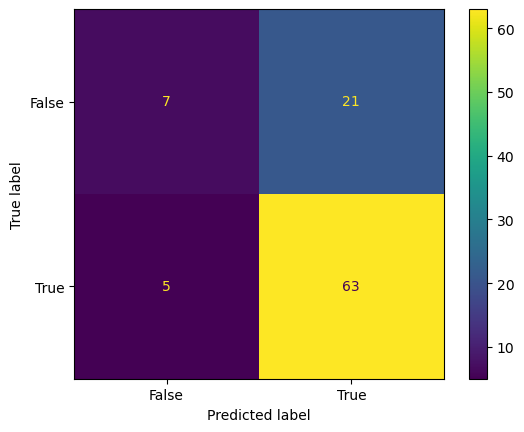

In [80]:
cm_dtr = confusion_matrix(y_test, y_pred_test_knn, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

## Analysis Model yang pertama

Agar lebih mudah untuk menganalisis hasil model yang telah dibuat, kumpulkan menjadi sebuah dataframe.

In [81]:
all_reports = {}

Masukkan hasil evaluasi performa kedalam dictionary

In [82]:
logistic = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test)
}
decisiontree = {
    'train - precision' : precision_score(y_train, y_pred_train_dtr),
    'train - recall' : recall_score(y_train, y_pred_train_dtr),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dtr),
    'train - f1_score' : f1_score(y_train, y_pred_train_dtr),
    'test - precision' : precision_score(y_test, y_pred_test_dtr),
    'test - recall' : recall_score(y_test, y_pred_test_dtr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dtr),
    'test - f1_score' : f1_score(y_test, y_pred_test_dtr)
}
knn = {
    'train - precision' : precision_score(y_train, y_pred_train_knn),
    'train - recall' : recall_score(y_train, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'test - recall' : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn)
}
svc = {
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'train - recall' : recall_score(y_train, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc)
}

Gabungkan dictionary yang ada menjadi Dataframe

In [83]:
all_reports["LogisticRegression"] = logistic
all_reports["SVM"] = svc
all_reports["DecisionTree"] = decisiontree
all_reports["KNN"] = knn
report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='test - precision', ascending=False)
report

,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
LogisticRegression,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
SVM,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
DecisionTree,1.000000,1.000000,1.000000,1.000000,0.769231,0.735294,0.656250,0.751880
KNN,0.810289,0.954545,0.815104,0.876522,0.750000,0.926471,0.729167,0.828947


tampilkan confussion matrix dari semua model yang sudah di training

Text(0.5, 1.0, 'KNN')

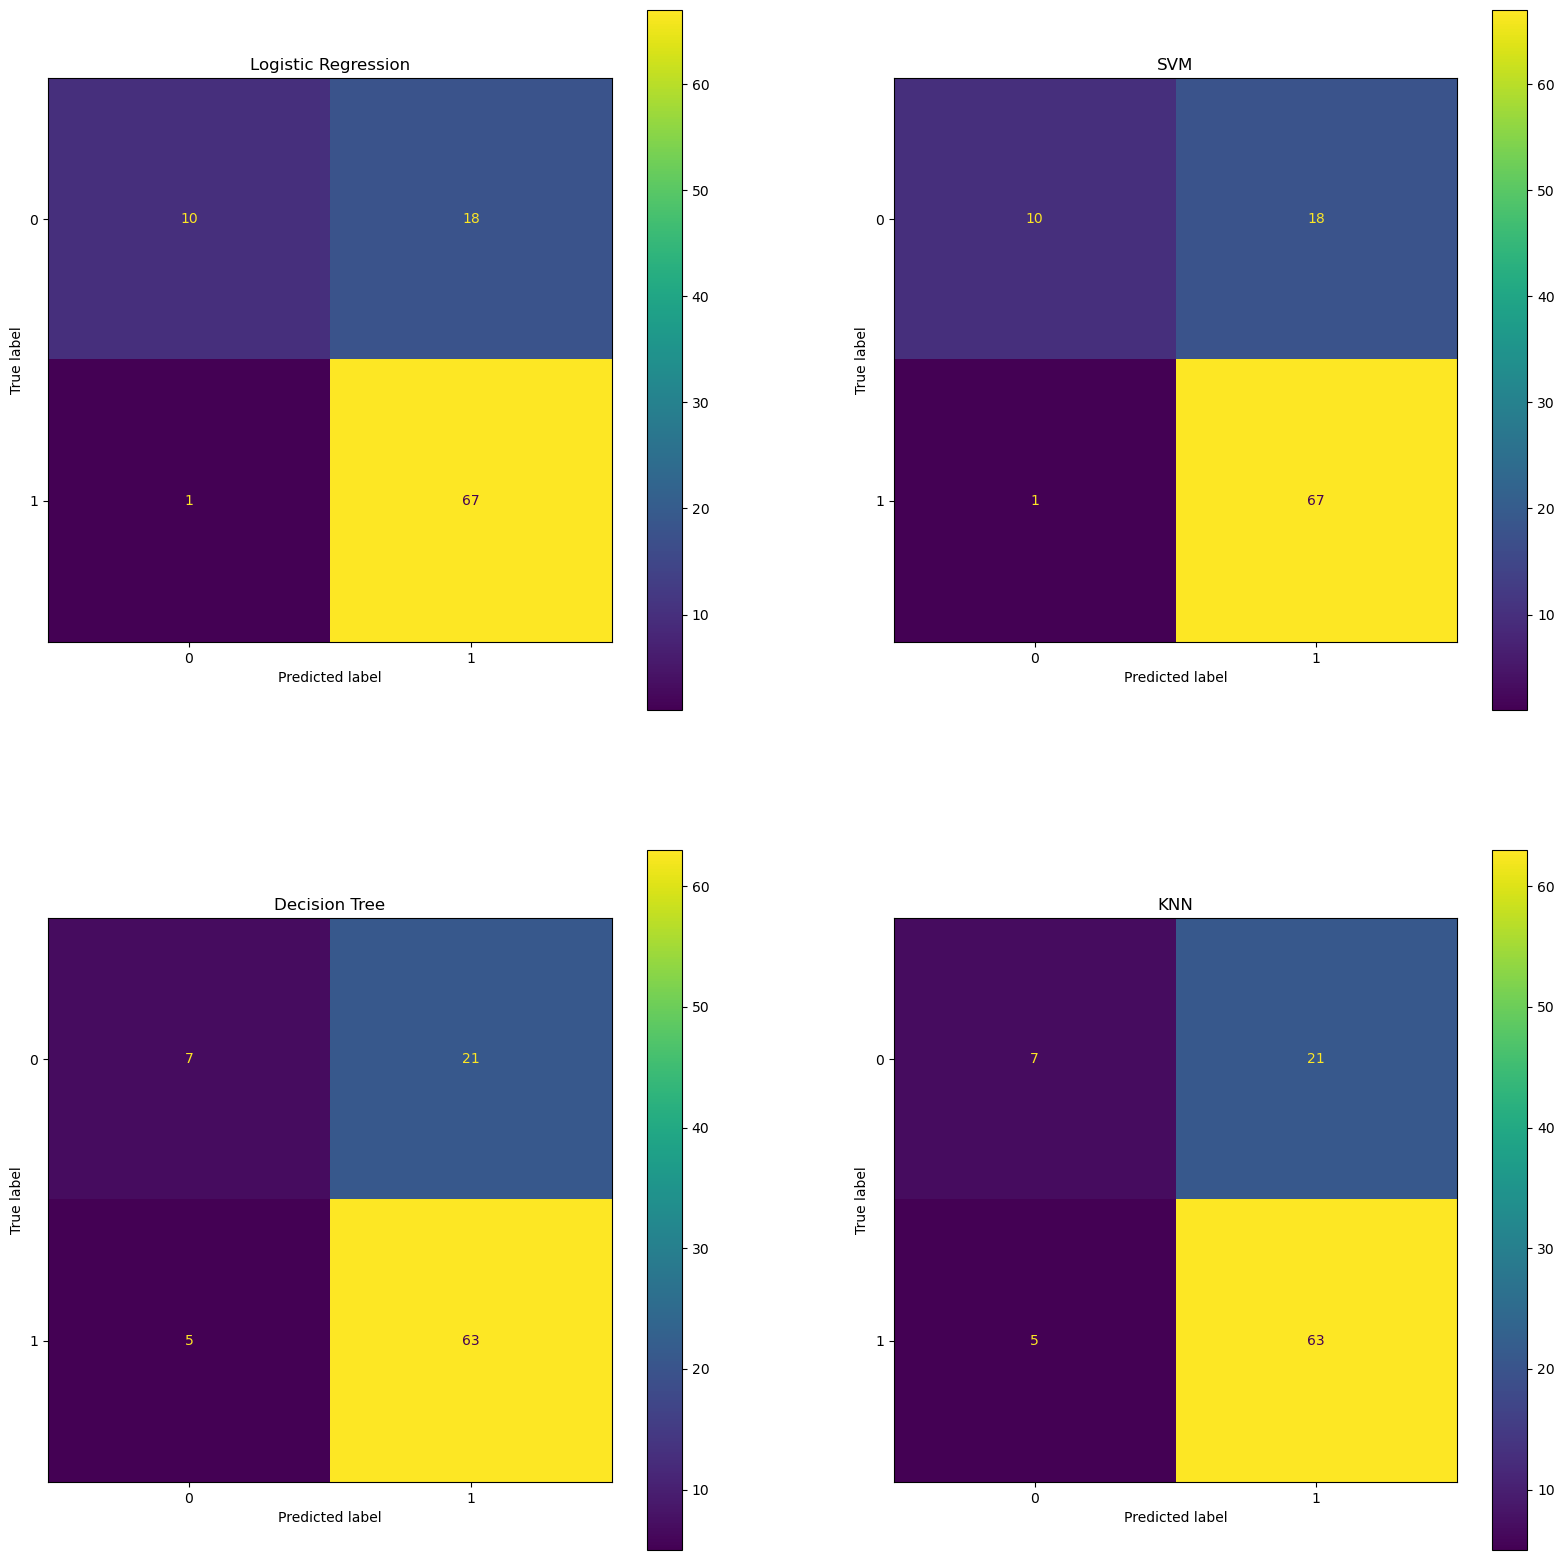

In [84]:
fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(20,20))


ConfusionMatrixDisplay(cm_log, display_labels = [0, 1]).plot(ax=ax[0][0])
ax[0][0].set_title('Logistic Regression')
ConfusionMatrixDisplay(cm_svc, display_labels = [0, 1]).plot(ax=ax[0][1])
ax[0][1].set_title('SVM')
ConfusionMatrixDisplay(cm_dtr, display_labels = [0, 1]).plot(ax=ax[1][0])
ax[1][0].set_title('Decision Tree')
ConfusionMatrixDisplay(cm_knn, display_labels = [0, 1]).plot(ax=ax[1][1])
ax[1][1].set_title('KNN')

In [85]:
report

,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
LogisticRegression,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
SVM,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
DecisionTree,1.000000,1.000000,1.000000,1.000000,0.769231,0.735294,0.656250,0.751880
KNN,0.810289,0.954545,0.815104,0.876522,0.750000,0.926471,0.729167,0.828947


Karena hasil dari model sudah dikumpulkan didalam satu tabel, maka analisis akan menjadi lebih mudah. Selain itu karena confussion matrixnya di gabung kedalam satu plot, maka analisis data akan menjadi lebih mudah.

Dari tabel dan plot diatas didapatkan bahwa model default parameter yang memiliki nilai test precision score terbaik adalah model LogisticRegressionc dan SVM. Setelah kita dapatkan hasil dari model dengan menggunakan parameter defaulnya, kita lakukan hyperparameter tuning kepada semua modelnya untuk menentukan model mana yang merupakan model yang terbaik.

## Tuning Hyperparameter

### Logistic Regression

In [86]:
# Define the parameter grid for GridSearchCV
param_grid_log = {
    'classifier__penalty': ['l1','l2'],
    'classifier__C': [0.1, 0.5, 1, 10, 15, 20,25,30],
    'classifier__solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter' : [2,3,4,5, 10, 15],
    'classifier__multi_class' : ['auto', 'ovr', 'multinomial']
}

# Create a GridSearchCV object
grid_log = GridSearchCV(pipeline_log, param_grid_log,verbose=3,refit=True,scoring ='precision', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_log.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_log.best_params_)
print("Best Precision score:", grid_log.best_score_)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters: {'classifier__C': 25, 'classifier__max_iter': 4, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
Best Precision score: 0.8465432877218209


In [87]:
hyperparam_df_log = pd.DataFrame(grid_log.cv_results_)
hyperparam_df_log.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']].head()

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
934,"{'classifier__C': 25, 'classifier__max_iter': ...",0.846543,0.839261,0.083240,0.065410,1,0.002400
454,"{'classifier__C': 10, 'classifier__max_iter': ...",0.825147,0.844094,0.043658,0.057945,2,0.002600
307,"{'classifier__C': 1, 'classifier__max_iter': 2...",0.824510,0.818833,0.040873,0.026376,3,0.002600
382,"{'classifier__C': 1, 'classifier__max_iter': 5...",0.822110,0.821593,0.035674,0.016894,4,0.002601
479,"{'classifier__C': 10, 'classifier__max_iter': ...",0.821937,0.830297,0.030393,0.030138,5,0.002800


In [88]:
# Get best model from GridSearch
best_model_log = grid_log.best_estimator_

# Fit best model on training data
best_model_log.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                       

In [89]:
y_pred_train_grid_log = best_model_log.predict(X_train)
y_pred_test_grid_log = best_model_log.predict(X_test)

In [90]:
print("Accuracy Score")
train_accuracy_grid_log = accuracy_score(y_train, y_pred_train_grid_log)
test_accuracy_grid_log = accuracy_score(y_test,y_pred_test_grid_log)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_log, test_accuracy_grid_log))
print("")
print("Precision Score")
train_precision_grid_log = precision_score(y_train, y_pred_train_grid_log)
test_precision_grid_log = precision_score(y_test,y_pred_test_grid_log)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_log, test_precision_grid_log))
print("")
print("Recall Score")
train_recall_grid_log = recall_score(y_train, y_pred_train_grid_log)
test_recall_grid_log = recall_score(y_test,y_pred_test_grid_log)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_log, test_recall_grid_log))
print("")
print("F1 Score")
train_f1_grid_log = f1_score(y_train, y_pred_train_grid_log)
test_f1_grid_log = f1_score(y_test,y_pred_test_grid_log)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_log, test_f1_grid_log))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_log))

Accuracy Score
Train Score: 0.7005208333333334
Test Score: 0.6458333333333334

Precision Score
Train Precision: 0.8340807174887892
Test Precision: 0.7833333333333333

Recall Score
Train Recall: 0.7045454545454546
Test Recall: 0.6911764705882353

F1 Score
Train F1: 0.7638603696098563
Test F1: 0.7343749999999999

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.42      0.54      0.47        28
        True       0.78      0.69      0.73        68

    accuracy                           0.65        96
   macro avg       0.60      0.61      0.60        96
weighted avg       0.68      0.65      0.66        96



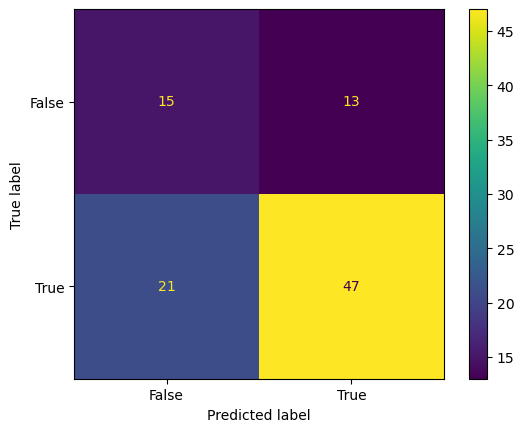

In [91]:
cm_grid_log = confusion_matrix(y_test, y_pred_test_grid_log, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_log,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

### SVM

In [92]:
# Define the parameter grid for GridSearchCV
param_grid_svc = {
    'classifier__C' : [0.5, 1, 2, 0.4, 0.6],
    'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'classifier__degree' : [2,3,4,5,6,7],
    'classifier__max_iter' : [-1, 2, 4,5, 6,3],
    'classifier__gamma' : ['scale', 'auto']
}

# Create a GridSearchCV object
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc,verbose=3,refit=True,scoring ='precision', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_svc.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_svc.best_params_)
print("Best Precision score:", grid_svc.best_score_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Best parameters: {'classifier__C': 0.5, 'classifier__degree': 6, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly', 'classifier__max_iter': 6}
Best Precision score: 0.8543593251253989


In [93]:
hyperparam_df_svc = pd.DataFrame(grid_svc.cv_results_)
hyperparam_df_svc.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']].head()

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
1000,"{'classifier__C': 2, 'classifier__degree': 6, ...",0.854359,0.794826,0.061582,0.043382,1,0.002200
1720,"{'classifier__C': 0.6, 'classifier__degree': 6...",0.854359,0.794826,0.061582,0.043382,1,0.002801
640,"{'classifier__C': 1, 'classifier__degree': 6, ...",0.854359,0.794826,0.061582,0.043382,1,0.002601
280,"{'classifier__C': 0.5, 'classifier__degree': 6...",0.854359,0.794826,0.061582,0.043382,1,0.003401
1360,"{'classifier__C': 0.4, 'classifier__degree': 6...",0.854359,0.794826,0.061582,0.043382,1,0.002201


In [94]:
# Get best model from GridSearch
best_model_svc = grid_svc.best_estimator_

# Fit best model on training data
best_model_svc.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

In [95]:
y_pred_train_grid_svc = best_model_svc.predict(X_train)
y_pred_test_grid_svc = best_model_svc.predict(X_test)

In [96]:
print("Accuracy Score")
train_accuracy_grid_svc = accuracy_score(y_train, y_pred_train_grid_svc)
test_accuracy_grid_svc = accuracy_score(y_test,y_pred_test_grid_svc)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_svc, test_accuracy_grid_svc))
print("")
print("Precision Score")
train_precision_grid_svc = precision_score(y_train, y_pred_train_grid_svc)
test_precision_grid_svc = precision_score(y_test,y_pred_test_grid_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_svc, test_precision_grid_svc))
print("")
print("Recall Score")
train_recall_grid_svc = recall_score(y_train, y_pred_train_grid_svc)
test_recall_grid_svc = recall_score(y_test,y_pred_test_grid_svc)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_svc, test_recall_grid_svc))
print("")
print("F1 Score")
train_f1_grid_svc = f1_score(y_train, y_pred_train_grid_svc)
test_f1_grid_svc = f1_score(y_test,y_pred_test_grid_svc)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_svc, test_f1_grid_svc))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_svc))

Accuracy Score
Train Score: 0.671875
Test Score: 0.6458333333333334

Precision Score
Train Precision: 0.6906077348066298
Test Precision: 0.6931818181818182

Recall Score
Train Recall: 0.946969696969697
Test Recall: 0.8970588235294118

F1 Score
Train F1: 0.7987220447284344
Test F1: 0.7820512820512822

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.12      0.04      0.06        28
        True       0.69      0.90      0.78        68

    accuracy                           0.65        96
   macro avg       0.41      0.47      0.42        96
weighted avg       0.53      0.65      0.57        96



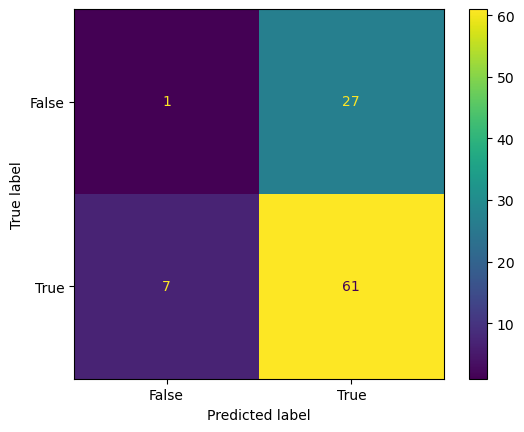

In [97]:
cm_grid_svc = confusion_matrix(y_test, y_pred_test_grid_svc, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_svc,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

### KNN

In [98]:
# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors' : [3,4,5,6],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size' : [2,3,4,5,10,15,1.5,1]
}

# Create a GridSearchCV object
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn,verbose=3,refit=True,scoring ='precision', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_knn.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_knn.best_params_)
print("Best Precision score:", grid_knn.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'classifier__algorithm': 'auto', 'classifier__leaf_size': 2, 'classifier__n_neighbors': 4, 'classifier__weights': 'uniform'}
Best Precision score: 0.7933112464048475


In [99]:
hyperparam_df_knn = pd.DataFrame(grid_knn.cv_results_)
hyperparam_df_knn.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']].head()

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
234,"{'classifier__algorithm': 'brute', 'classifier...",0.793311,0.864363,0.025411,0.009196,1,0.004800
146,"{'classifier__algorithm': 'kd_tree', 'classifi...",0.793311,0.864363,0.025411,0.009196,1,0.004801
242,"{'classifier__algorithm': 'brute', 'classifier...",0.793311,0.864363,0.025411,0.009196,1,0.004200
98,"{'classifier__algorithm': 'ball_tree', 'classi...",0.793311,0.864363,0.025411,0.009196,1,0.004200
26,"{'classifier__algorithm': 'auto', 'classifier_...",0.793311,0.864363,0.025411,0.009196,1,0.005400


In [100]:
# Get best model from GridSearch
best_model_knn = grid_knn.best_estimator_

# Fit best model on training data
best_model_knn.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

In [101]:
y_pred_train_grid_knn = best_model_knn.predict(X_train)
y_pred_test_grid_knn = best_model_knn.predict(X_test)

In [102]:
print("Accuracy Score")
train_accuracy_grid_knn = accuracy_score(y_train, y_pred_train_grid_knn)
test_accuracy_grid_knn = accuracy_score(y_test,y_pred_test_grid_knn)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_knn, test_accuracy_grid_knn))
print("")
print("Precision Score")
train_precision_grid_knn = precision_score(y_train, y_pred_train_grid_knn)
test_precision_grid_knn = precision_score(y_test,y_pred_test_grid_knn)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_knn, test_precision_grid_knn))
print("")
print("Recall Score")
train_recall_grid_knn = recall_score(y_train, y_pred_train_grid_knn)
test_recall_grid_knn = recall_score(y_test,y_pred_test_grid_knn)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_knn, test_recall_grid_knn))
print("")
print("F1 Score")
train_f1_grid_knn = f1_score(y_train, y_pred_train_grid_knn)
test_f1_grid_knn = f1_score(y_test,y_pred_test_grid_knn)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_knn, test_f1_grid_knn))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_knn))

Accuracy Score
Train Score: 0.8515625
Test Score: 0.7083333333333334

Precision Score
Train Precision: 0.8709677419354839
Test Precision: 0.7631578947368421

Recall Score
Train Recall: 0.9204545454545454
Test Recall: 0.8529411764705882

F1 Score
Train F1: 0.8950276243093922
Test F1: 0.8055555555555555

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.50      0.36      0.42        28
        True       0.76      0.85      0.81        68

    accuracy                           0.71        96
   macro avg       0.63      0.61      0.61        96
weighted avg       0.69      0.71      0.69        96



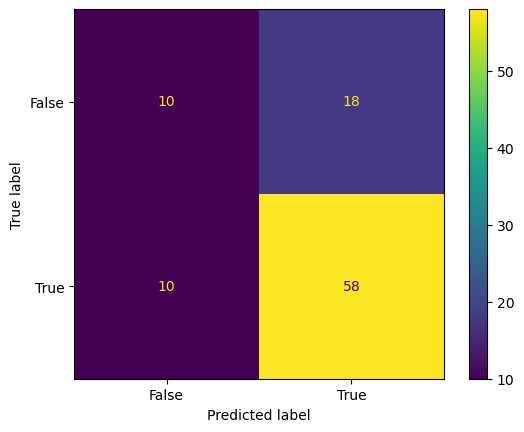

In [103]:
cm_grid_knn = confusion_matrix(y_test, y_pred_test_grid_knn, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_knn,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

### Decision Tree

In [104]:
# Define the parameter grid for GridSearchCV
param_grid_dtr = {
    'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth' : [None,2,3,4,5,6],
    'classifier__min_samples_split' : [5,6, 7,8, 9],
    'classifier__min_samples_leaf' : [1,2, 3, 5],
    'classifier__random_state' : [24],
    'classifier__max_features' : ['auto', 'sqrt', 'log2', None]
}

# Create a GridSearchCV object
grid_dtr = GridSearchCV(pipeline_dtr, param_grid_dtr,verbose=3,refit=True,scoring ='precision', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_dtr.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_dtr.best_params_)
print("Best Precision score:", grid_dtr.best_score_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6, 'classifier__random_state': 24}
Best Precision score: 0.8234433541480822


In [105]:
hyperparam_df_dtr = pd.DataFrame(grid_dtr.cv_results_)
hyperparam_df_dtr.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']].head()

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
486,"{'classifier__criterion': 'entropy', 'classifi...",0.823443,0.928863,0.038914,0.016949,1,0.002800
506,"{'classifier__criterion': 'entropy', 'classifi...",0.823443,0.928863,0.038914,0.016949,1,0.002400
526,"{'classifier__criterion': 'entropy', 'classifi...",0.823443,0.928863,0.038914,0.016949,1,0.002600
546,"{'classifier__criterion': 'entropy', 'classifi...",0.819843,0.972460,0.026243,0.013468,4,0.002600
547,"{'classifier__criterion': 'entropy', 'classifi...",0.819754,0.976004,0.024723,0.014389,5,0.002601


In [106]:
# Get best model from GridSearch
best_model_dtr = grid_dtr.best_estimator_

# Fit best model on training data
best_model_dtr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat1',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                      

In [107]:
y_pred_train_grid_dtr = best_model_dtr.predict(X_train)
y_pred_test_grid_dtr = best_model_dtr.predict(X_test)

In [108]:
print("Accuracy Score")
train_accuracy_grid_dtr = accuracy_score(y_train, y_pred_train_grid_dtr)
test_accuracy_grid_dtr = accuracy_score(y_test,y_pred_test_grid_dtr)

print('Train Score: {0}\nTest Score: {1}'.format(train_accuracy_grid_dtr, test_accuracy_grid_dtr))
print("")
print("Precision Score")
train_precision_grid_dtr = precision_score(y_train, y_pred_train_grid_dtr)
test_precision_grid_dtr = precision_score(y_test,y_pred_test_grid_dtr)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_grid_dtr, test_precision_grid_dtr))
print("")
print("Recall Score")
train_recall_grid_dtr = recall_score(y_train, y_pred_train_grid_dtr)
test_recall_grid_dtr = recall_score(y_test,y_pred_test_grid_dtr)

print('Train Recall: {0}\nTest Recall: {1}'.format(train_recall_grid_dtr, test_recall_grid_dtr))
print("")
print("F1 Score")
train_f1_grid_dtr = f1_score(y_train, y_pred_train_grid_dtr)
test_f1_grid_dtr = f1_score(y_test,y_pred_test_grid_dtr)

print('Train F1: {0}\nTest F1: {1}'.format(train_f1_grid_dtr, test_f1_grid_dtr))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_grid_dtr))

Accuracy Score
Train Score: 0.875
Test Score: 0.71875

Precision Score
Train Precision: 0.932
Test Precision: 0.8059701492537313

Recall Score
Train Recall: 0.8825757575757576
Test Recall: 0.7941176470588235

F1 Score
Train F1: 0.9066147859922179
Test F1: 0.8

TEST PERFORMANCE
              precision    recall  f1-score   support

       False       0.52      0.54      0.53        28
        True       0.81      0.79      0.80        68

    accuracy                           0.72        96
   macro avg       0.66      0.66      0.66        96
weighted avg       0.72      0.72      0.72        96



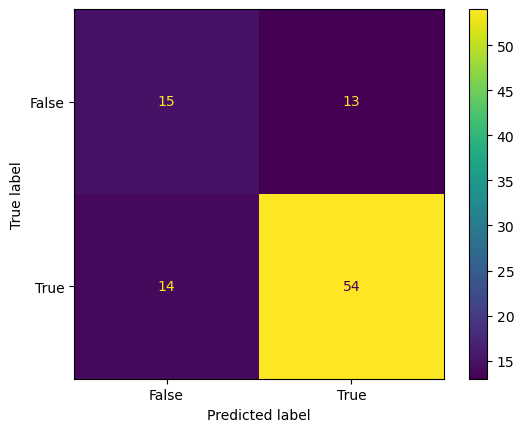

In [109]:
cm_grid_dtr = confusion_matrix(y_test, y_pred_test_grid_dtr, labels=pipeline_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid_dtr,display_labels=pipeline_log.classes_)

disp.plot()
plt.show()

## Analysis Model

In [110]:
logistic = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test)
}
decisiontree = {
    'train - precision' : precision_score(y_train, y_pred_train_dtr),
    'train - recall' : recall_score(y_train, y_pred_train_dtr),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dtr),
    'train - f1_score' : f1_score(y_train, y_pred_train_dtr),
    'test - precision' : precision_score(y_test, y_pred_test_dtr),
    'test - recall' : recall_score(y_test, y_pred_test_dtr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dtr),
    'test - f1_score' : f1_score(y_test, y_pred_test_dtr)
}
knn = {
    'train - precision' : precision_score(y_train, y_pred_train_knn),
    'train - recall' : recall_score(y_train, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'test - recall' : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn)
}
svc = {
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'train - recall' : recall_score(y_train, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc)
}
grid_dict_log = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_log),
    'train - recall' : recall_score(y_train, y_pred_train_grid_log),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_log),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_log),
    'test - precision' : precision_score(y_test, y_pred_test_grid_log),
    'test - recall' : recall_score(y_test, y_pred_test_grid_log),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_log),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_log)
}
grid_dict_svc = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_svc),
    'train - recall' : recall_score(y_train, y_pred_train_grid_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_svc),
    'test - precision' : precision_score(y_test, y_pred_test_grid_svc),
    'test - recall' : recall_score(y_test, y_pred_test_grid_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_svc)
}
grid_dict_knn = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_knn),
    'train - recall' : recall_score(y_train, y_pred_train_grid_knn),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_knn),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_knn),
    'test - precision' : precision_score(y_test, y_pred_test_grid_knn),
    'test - recall' : recall_score(y_test, y_pred_test_grid_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_knn)
}
grid_dict_dtr = {
    'train - precision' : precision_score(y_train, y_pred_train_grid_dtr),
    'train - recall' : recall_score(y_train, y_pred_train_grid_dtr),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_grid_dtr),
    'train - f1_score' : f1_score(y_train, y_pred_train_grid_dtr),
    'test - precision' : precision_score(y_test, y_pred_test_grid_dtr),
    'test - recall' : recall_score(y_test, y_pred_test_grid_dtr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_grid_dtr),
    'test - f1_score' : f1_score(y_test, y_pred_test_grid_dtr)
}

In [111]:
all_reports ={}
all_reports["LogisticRegression"] = logistic
all_reports["SVM"] = svc
all_reports["DecisionTree"] = decisiontree
all_reports["KNN"] = knn
all_reports["Grid_LogisticRegression"] = grid_dict_log
all_reports["Grid_SVM"] = grid_dict_svc
all_reports["Grid_DecisionTree"] = grid_dict_dtr
all_reports["Grid_KNN"] = grid_dict_knn
report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='test - precision', ascending=False)
report

,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
Grid_DecisionTree,0.932000,0.882576,0.875000,0.906615,0.805970,0.794118,0.718750,0.800000
LogisticRegression,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
SVM,0.793846,0.977273,0.809896,0.876061,0.788235,0.985294,0.802083,0.875817
Grid_LogisticRegression,0.834081,0.704545,0.700521,0.763860,0.783333,0.691176,0.645833,0.734375
DecisionTree,1.000000,1.000000,1.000000,1.000000,0.769231,0.735294,0.656250,0.751880
Grid_KNN,0.870968,0.920455,0.851562,0.895028,0.763158,0.852941,0.708333,0.805556
KNN,0.810289,0.954545,0.815104,0.876522,0.750000,0.926471,0.729167,0.828947
Grid_SVM,0.690608,0.946970,0.671875,0.798722,0.693182,0.897059,0.645833,0.782051


Text(0.5, 1.0, 'KNN(Tuning)')

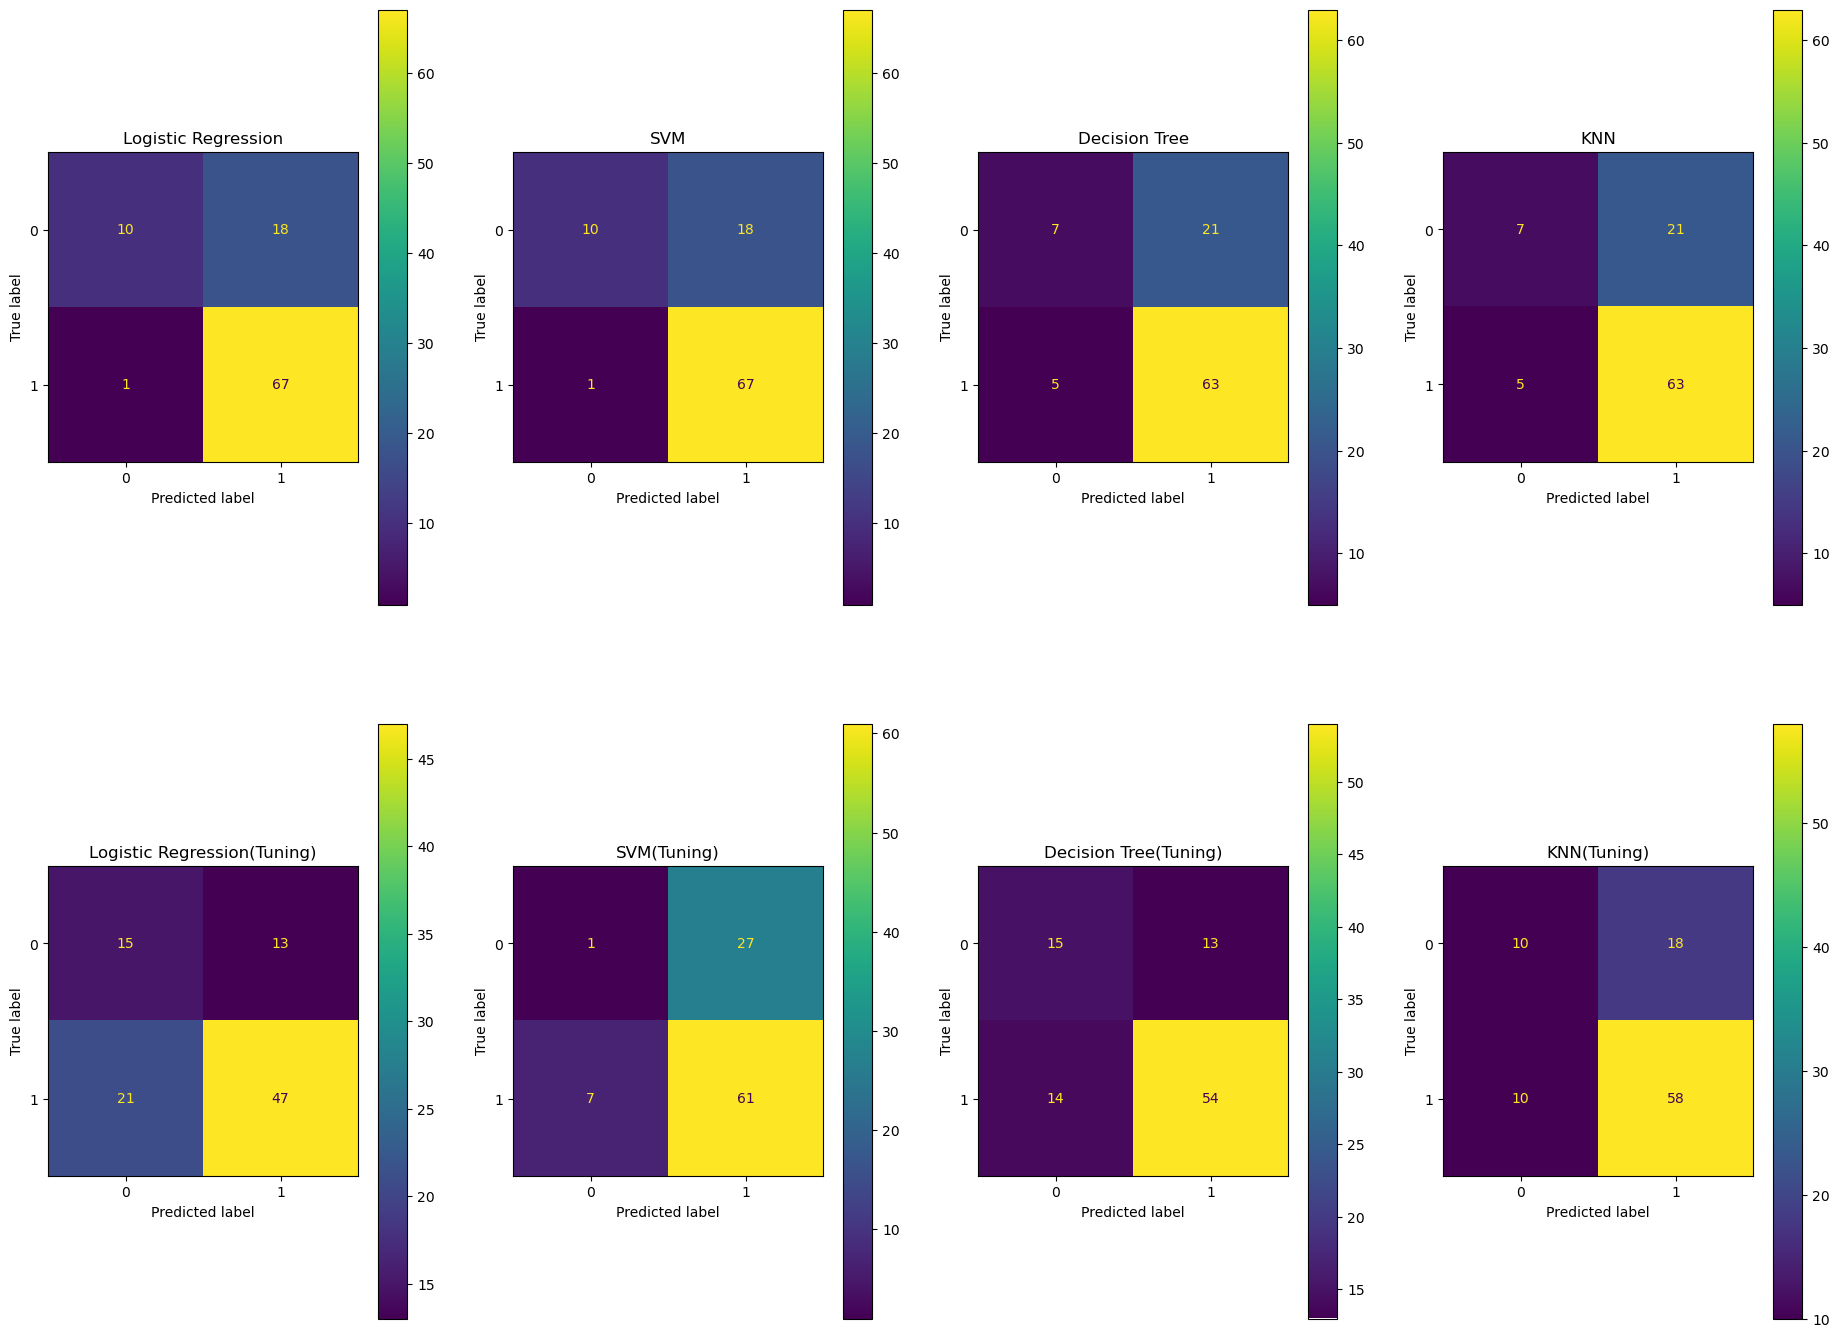

In [112]:
fig, ax = plt.subplots(ncols=4, nrows=2,figsize=(23,17))


ConfusionMatrixDisplay(cm_log, display_labels = [0, 1]).plot(ax=ax[0][0])
ax[0][0].set_title('Logistic Regression')
ConfusionMatrixDisplay(cm_svc, display_labels = [0, 1]).plot(ax=ax[0][1])
ax[0][1].set_title('SVM')
ConfusionMatrixDisplay(cm_dtr, display_labels = [0, 1]).plot(ax=ax[0][2])
ax[0][2].set_title('Decision Tree')
ConfusionMatrixDisplay(cm_knn, display_labels = [0, 1]).plot(ax=ax[0][3])
ax[0][3].set_title('KNN')
ConfusionMatrixDisplay(cm_grid_log, display_labels = [0, 1]).plot(ax=ax[1][0])
ax[1][0].set_title('Logistic Regression(Tuning)')
ConfusionMatrixDisplay(cm_grid_svc, display_labels = [0, 1]).plot(ax=ax[1][1])
ax[1][1].set_title('SVM(Tuning)')
ConfusionMatrixDisplay(cm_grid_dtr, display_labels = [0, 1]).plot(ax=ax[1][2])
ax[1][2].set_title('Decision Tree(Tuning)')
ConfusionMatrixDisplay(cm_grid_knn, display_labels = [0, 1]).plot(ax=ax[1][3])
ax[1][3].set_title('KNN(Tuning)')

Berdasarkan hasil dari precision score test terbaiknya, didapatkan bahwa hampir semua model yang telah dituning hasil test precision scorenya meningkat. Dari plot tabel dan plot diatas juga didapatkan bahwa model yang terbaik untuk memprediksi di approve atau tidak di approvenya suatu pengajuan pinjaman di company adalah model DecisionTree yang telah di tuning hyperparameternya, Hal ini dapat terlihat dari hasil test precision scorenya. Pada model ini nilai precision scorenya itu 80.5% atau 1.5% lebih baik daripada model yang memiliki precision score terbaik kedua yaitu model logistic regression yang telah di tuning hyperparameternya.

## Analysis Model

Dari hasil permodelan 10 buah algoritma didapatkan informasi bahwa nilai precision nya itu beragam, dari yang terendah yaitu model `SVM` yang telah di tuning hyperparameternya, dengan nilai test precision 0.693182 hingga ke model dengan nilai precision yang paling tinggi, yaitu DecisionTree yang sudah di tuning hyper parameternya dengan nilai test precision score 0.805970.

Dari permodelan juga ditemukan bahwa model best_model_dtr atau DecisionTree yang sudah di tuning itu termasuk kedalam golongan model yang Overfit, karena nilai `train_precision` nya 0.93200 dan nilai `test_precision` nya 0.805970.

Jika kita menggunakan hasil dari test precision score sebagai acuannya, maka berarti jika ada 100 orang yang mengajukan pinjaman dan hasil model memprediksi bahwa 100 orang tersebut aman untuk di approve pengajuan pinjamannya kita memiliki kemungkinan prediksi yang tepat sebanyak 80 orang, dan memiliki kemungkinan salah prediksi sebanyak 20 orang.

# 9. Model Saving

In [113]:
# Save the files

#with open("best_model_dtr.pkl", "wb") as file_1:
#    pickle.dump(best_model_dtr, file_1)

#with open("list_num_cols.txt", "w") as file_2:
#    json.dump(num_cols, file_2)

#with open("list_catn_cols.txt", "w") as file_3:
#    json.dump(catn_cols, file_3)


# 10. Model Inference

Model Inference ada di notebook baru

# 11. Kesimpulan

Kesimpulan

- Dari EDA saya temukan bahwa data yang ada pada kolom target atau kolom dependen itu tidak balance. Dari EDA juga saya dapatkan bahwa jenis kelamin, area tempat tinggal dan tingkat edukasi sangatlah mempengaruhi apakah pinjaman akan di approve atau tidak.

- Dari Model Evaluation saya dapatkan bahwa dari 8 model algoritma yang digunakan, performanya itu beragam. Dan dari 8 model algoritma yang digunakan, Model DecisionTree yang dituning parameternya itu adalah model yang memiliki hasil paling baik, Yaitu memiliki nilai precision train sebesar 92% dan nilai precision test sebesar 80%. Yang berarti model tergolong model yang Over fit. Selain itu karena nilai precision testnya 80% kita dapat mengatakan bahwa model cukup baik, karena jika kita memprediksi bahwa orang yang aman untuk dicarikan pengajuan pinjamannya ada 100 orang, maka besar kemungkinan bahwa 80 orang yang kita prediksi itu benar-benar aman.

- Akan tetapi model yang saya miliki ini masih memiliki kelemahan, yaitu model yang saya miliki tidak dapat memprediksi jika salah satu kolom dari data baru itu tidak sesuai dengan format data awal. Selain itu, Karena data pada kolom variabel dependennya tidak seimbang, maka hasil nilai recall untuk Negative itu sangatlah rendah.

- Untuk meng improve model yang saya miliki saat ini, saya akan membuat data target atau variabel dependennya balanced menggunakan SMOTENC agar data variabel positifnya bisa di over sampling agar datanya balanced. Selain itu saya juga akan mencoba untuk tidak drop data yang ada nilai null nya, akan tetapi saya imputasi menurut aturan.